Data Preprocessing

In [73]:
import pandas as pd
niwaDf  = pd.read_csv('../data/niwa_cleaned/1971-2023-WeatherData.csv', parse_dates=['Date'])
niwaDf.head()

,Date,Wdir (Deg),WSpd (m/s),GustDir (Deg),GustSpd (m/s),Tdry (C),Twet (C),RH (%),Tmax (C),Tmin (C),Tgmin (C),ET10 (C),Pmsl (hPa),Rad (MJ/m2),Rain (mm)
0,1971-07-01,0.0,0.0,40.0,9.8,7.5,7.5,100.0,16.6,6.9,1.5,10.1,1019.5,8.9,1.4
1,1971-07-02,70.0,13.4,60.0,23.7,14.0,12.4,82.1,14.4,8.9,10.2,12.0,1009.8,0.5,64.7
2,1971-07-03,120.0,4.6,130.0,7.7,9.3,8.4,88.0,14.0,7.7,4.0,10.5,1006.1,7.8,6.1
3,1971-07-04,200.0,3.1,130.0,10.3,9.6,8.3,82.9,14.1,8.9,6.7,10.8,1010.9,9.0,5.4
4,1971-07-05,260.0,5.1,210.0,18.5,11.9,10.8,86.7,14.7,8.3,4.6,10.8,1014.2,8.4,1.2


In [74]:
niwaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           18834 non-null  datetime64[ns]
 1   Wdir (Deg)     18831 non-null  float64       
 2   WSpd (m/s)     18831 non-null  float64       
 3   GustDir (Deg)  18484 non-null  float64       
 4   GustSpd (m/s)  18635 non-null  float64       
 5   Tdry (C)       18831 non-null  float64       
 6   Twet (C)       18792 non-null  float64       
 7   RH (%)         18792 non-null  float64       
 8   Tmax (C)       18754 non-null  float64       
 9   Tmin (C)       18702 non-null  float64       
 10  Tgmin (C)      18526 non-null  float64       
 11  ET10 (C)       18593 non-null  float64       
 12  Pmsl (hPa)     18831 non-null  float64       
 13  Rad (MJ/m2)    18434 non-null  float64       
 14  Rain (mm)      18774 non-null  float64       
dtypes: datetime64[ns](1

In [75]:
print(niwaDf.isna().sum())

Date               0
Wdir (Deg)         3
WSpd (m/s)         3
GustDir (Deg)    350
GustSpd (m/s)    199
Tdry (C)           3
Twet (C)          42
RH (%)            42
Tmax (C)          80
Tmin (C)         132
Tgmin (C)        308
ET10 (C)         241
Pmsl (hPa)         3
Rad (MJ/m2)      400
Rain (mm)         60
dtype: int64


In [76]:
# drop the rows with missing values
niwaDf.dropna(inplace=True)

In [77]:
niwaDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17973 entries, 0 to 18833
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           17973 non-null  datetime64[ns]
 1   Wdir (Deg)     17973 non-null  float64       
 2   WSpd (m/s)     17973 non-null  float64       
 3   GustDir (Deg)  17973 non-null  float64       
 4   GustSpd (m/s)  17973 non-null  float64       
 5   Tdry (C)       17973 non-null  float64       
 6   Twet (C)       17973 non-null  float64       
 7   RH (%)         17973 non-null  float64       
 8   Tmax (C)       17973 non-null  float64       
 9   Tmin (C)       17973 non-null  float64       
 10  Tgmin (C)      17973 non-null  float64       
 11  ET10 (C)       17973 non-null  float64       
 12  Pmsl (hPa)     17973 non-null  float64       
 13  Rad (MJ/m2)    17973 non-null  float64       
 14  Rain (mm)      17973 non-null  float64       
dtypes: datetime64[ns](1), fl

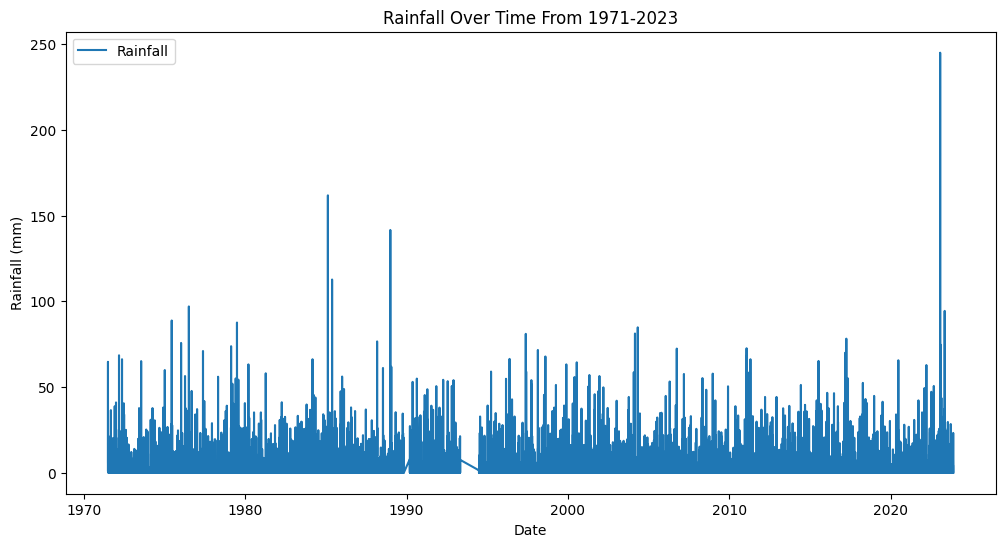

In [78]:
# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Time series plot of rainfall
plt.figure(figsize=(12, 6))
plt.plot(niwaDf['Date'], niwaDf['Rain (mm)'], label='Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Over Time From 1971-2023')
plt.legend()
plt.show()

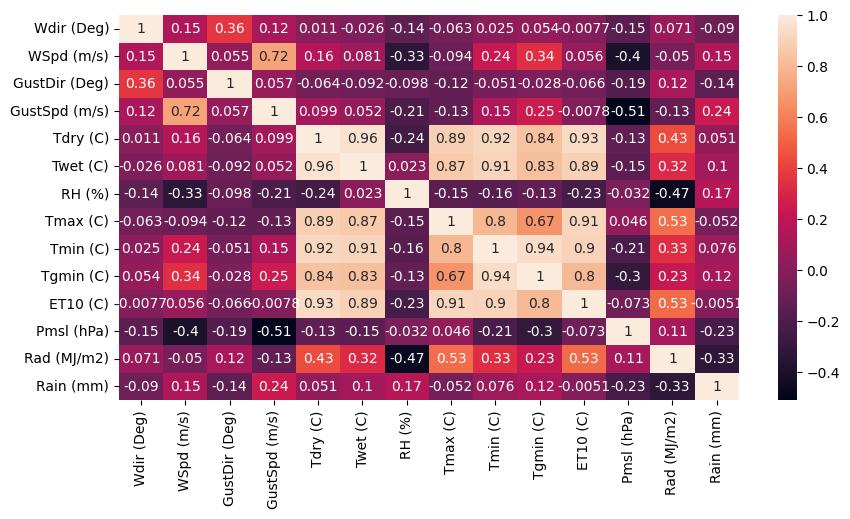

In [79]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Heatmap for correlation between variables
niwaDf = niwaDf.set_index('Date')
# Select only the numeric columns from the 'weather' DataFrame
numeric_columns = niwaDf.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 5))
sns.heatmap(niwaDf.corr(), annot=True)
plt.show()

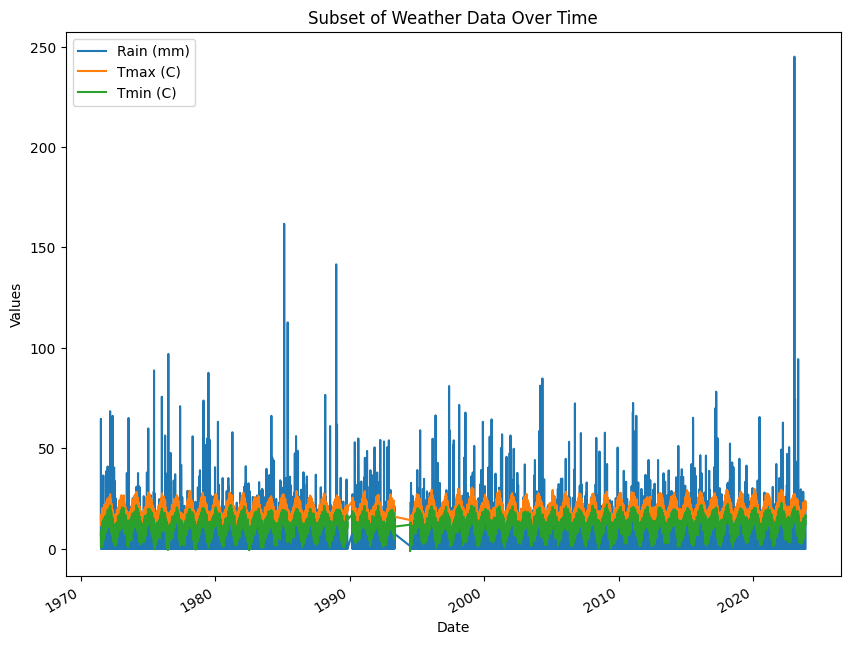

In [80]:
subset_columns = ['Rain (mm)','Tmax (C)', 'Tmin (C)', ]

# Plotting only a subset of columns
niwaDf[subset_columns].plot(figsize=(10, 8))
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Subset of Weather Data Over Time')
plt.show()

# Lag Features

In [81]:
lag_size = 7

# Create lag features for 'Rainfall (mm)'
for column in ['Wdir (Deg)', 'WSpd (m/s)', 'GustDir (Deg)', 'GustSpd (m/s)',
       'Tdry (C)', 'Twet (C)', 'RH (%)', 'Tmax (C)', 'Tmin (C)', 'Tgmin (C)',
       'ET10 (C)', 'Pmsl (hPa)', 'Rad (MJ/m2)', 'Rain (mm)']:
    for i in range(1, lag_size + 1):
        niwaDf[f'{column}_lag_{i}'] = niwaDf[column].shift(i)


niwaDf.dropna(inplace=True)  # Drop rows with NaN values in the lag features

# Split Data

In [82]:
niwaDf.columns

Index(['Wdir (Deg)', 'WSpd (m/s)', 'GustDir (Deg)', 'GustSpd (m/s)',
       'Tdry (C)', 'Twet (C)', 'RH (%)', 'Tmax (C)', 'Tmin (C)', 'Tgmin (C)',
       ...
       'Rad (MJ/m2)_lag_5', 'Rad (MJ/m2)_lag_6', 'Rad (MJ/m2)_lag_7',
       'Rain (mm)_lag_1', 'Rain (mm)_lag_2', 'Rain (mm)_lag_3',
       'Rain (mm)_lag_4', 'Rain (mm)_lag_5', 'Rain (mm)_lag_6',
       'Rain (mm)_lag_7'],
      dtype='object', length=112)

In [83]:
from sklearn.model_selection import train_test_split

# Define features and target
columns_to_drop = ['Rain (mm)_lag_1', 'Rain (mm)_lag_2', 'Rain (mm)_lag_3',
       'Rain (mm)_lag_4', 'Rain (mm)_lag_5', 'Rain (mm)_lag_6',
       'Rain (mm)_lag_7', 'Rain (mm)']

X = niwaDf.drop(columns=columns_to_drop, axis=1)
y = niwaDf['Rain (mm)_lag_1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM Model

In [84]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape the data for LSTM (assuming lag_size=3)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Make predictions
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_predictions = lstm_predictions.flatten()

Epoch 1/50
405/405 [==============================] - 4s 4ms/step - loss: 60.0648 - val_loss: 44.2806
Epoch 2/50
405/405 [==============================] - 1s 3ms/step - loss: 58.7646 - val_loss: 44.3029
Epoch 3/50
405/405 [==============================] - 1s 3ms/step - loss: 58.7319 - val_loss: 44.2743
Epoch 4/50
405/405 [==============================] - 1s 3ms/step - loss: 58.6697 - val_loss: 44.3409
Epoch 5/50
405/405 [==============================] - 1s 3ms/step - loss: 58.6559 - val_loss: 44.3595
Epoch 6/50
405/405 [==============================] - 1s 3ms/step - loss: 58.6576 - val_loss: 44.3490
Epoch 7/50
405/405 [==============================] - 1s 3ms/step - loss: 58.6701 - val_loss: 44.3142
Epoch 8/50
405/405 [==============================] - 1s 3ms/step - loss: 58.6581 - val_loss: 44.3392
Epoch 9/50
405/405 [==============================] - 1s 3ms/step - loss: 58.6595 - val_loss: 44.3714
Epoch 10/50
405/405 [==============================] - 1s 3ms/step - loss: 58.6553

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Assuming you have predictions and true values for your model
# For example, let's say you have rf_predictions and y_test

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, lstm_predictions))

# Calculate MAE
mae = mean_absolute_error(y_test, lstm_predictions)

# Calculate MSE
mse = mean_squared_error(y_test, lstm_predictions)

# Calculate R2 score
r2 = r2_score(y_test, lstm_predictions)

# Print the metrics
print("LSTM Root Mean Squared Error (RMSE):", rmse)
print("LSTM Mean Absolute Error (MAE):", mae)
print("LSTM Mean Squared Error (MSE):", mse)
print("LSTM R2 Score:", r2)

LSTM Root Mean Squared Error (RMSE): 7.24463555287366
LSTM Mean Absolute Error (MAE): 4.065794061433626
LSTM Mean Squared Error (MSE): 52.48474429396105
LSTM R2 Score: -0.00019285666522450562


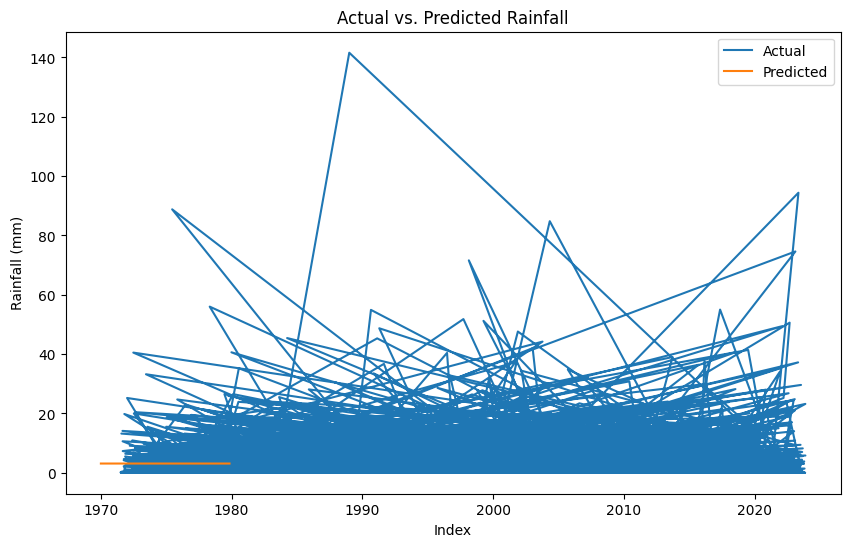

In [86]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.title('Actual vs. Predicted Rainfall')
plt.xlabel('Index')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()